In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try: 
    plt.style.use('bjornstyle')
except (ValueError, IOError, AttributeError): print("Preferred matplotlib style file not found.")
colors = [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])]

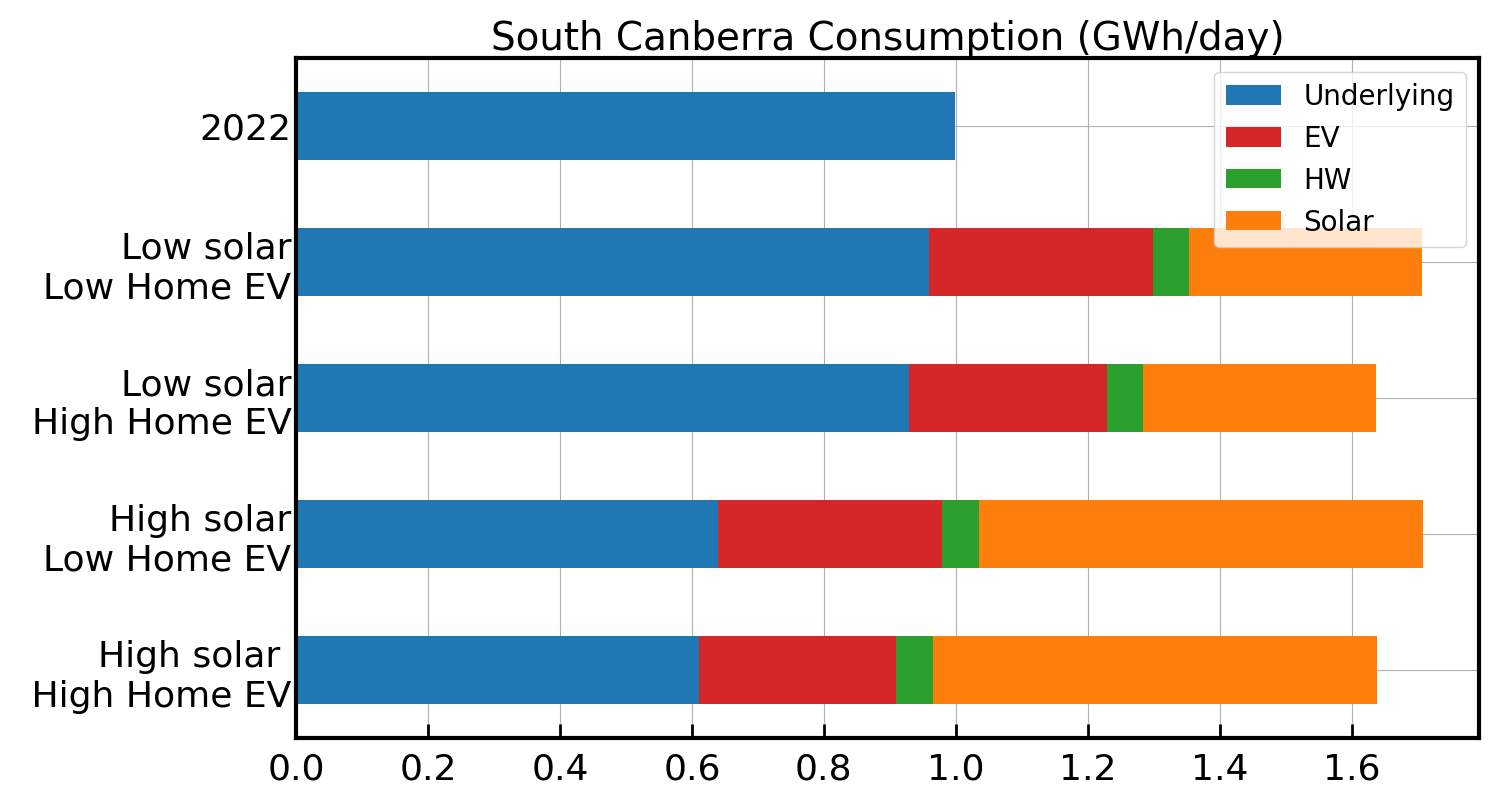

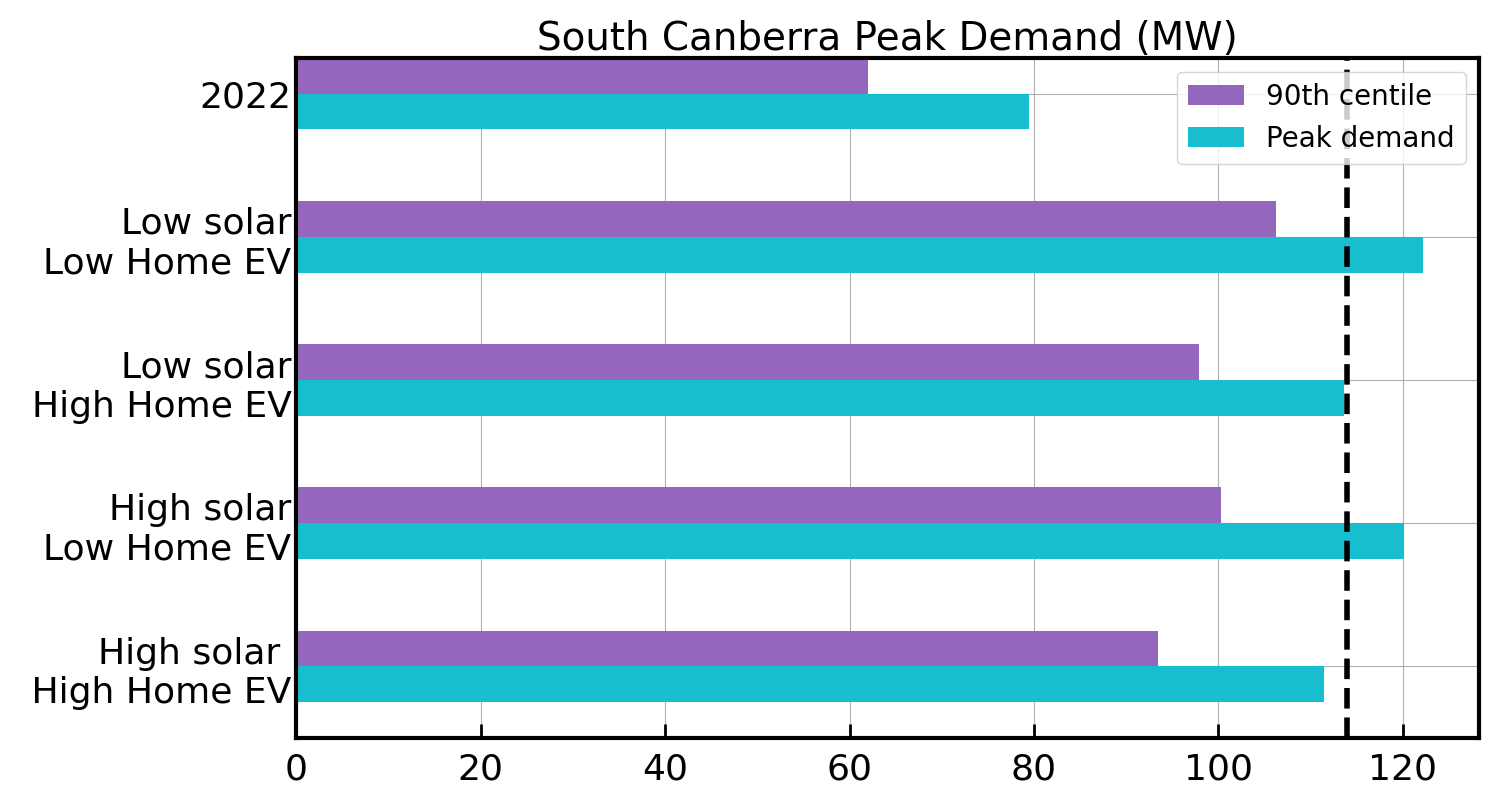

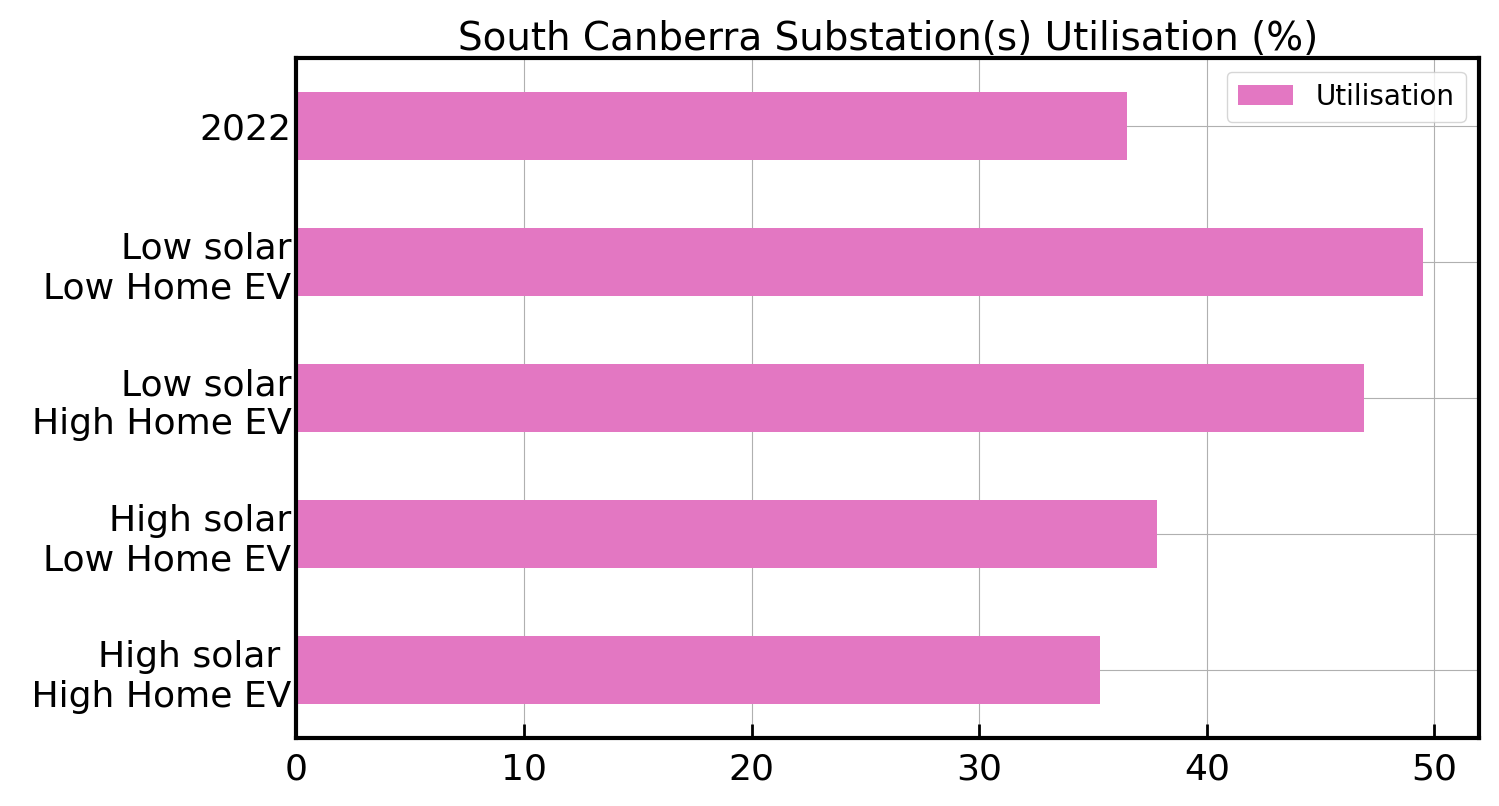

In [11]:
local = "Belconnen"
# High solar High Home EV, High solar Low Home EV, Low solar High Home EV, Low solar Low Home EV, Current
total_consumption = [1.375, 1.276, 1.795, 1.696, 1.321]
utilisation = [38.2, 35.5, 49.8, 47.1, 36.7]
POE_90 = [154.2, 148.3, 154.8, 148.8, 106.9]
peak = [175.1, 174.7, 175.3, 174.9, 133.8]
EV_value1 = 0.5199
EV_value2 = 0.4621
HW_value = 0.144
solar_value1 = 0.8861
solar_value2 = 0.465
zs_capacity = 169 # 2hr emergency rating

# local = "Gungahlin"
# total_consumption = [0.988, 0.905, 1.148, 1.064, 0.706]
# utilisation = [72.2, 66.1, 83.9, 77.8, 51.6]
# POE_90 = [98.1, 92.1, 98.6, 92.7, 62.4]
# peak = [111.8, 111.4, 114.2, 111.5, 88.3]
# EV_value1 = 0.4434
# EV_value2 = 0.3941
# HW_value = 0.109
# solar_value1 = 0.3367
# solar_value2 = 0.1767
# zs_capacity = 74

local = "North Canberra"
total_consumption = [1.974, 2.028, 2.548, 2.602, 1.637]
utilisation = [40.1, 41.2, 51.8, 52.9, 33.3]
POE_90 = [183.3, 185.2, 186.4, 193.9, 94.4]
peak = [209.9, 218.5, 215.2, 223.9, 128.9]
EV_value1 = 0.4629
EV_value2 = 0.5876
HW_value = 0.1433
solar_value1 = 1.211
solar_value2 = 0.6355
zs_capacity = 205

local = "South Canberra"
total_consumption = [.965, 1.035, 1.284, 1.354, 0.999]
utilisation = [35.3, 37.8, 46.9, 49.5, 36.5]
POE_90 = [93.4, 100.3, 97.9, 106.2, 62]
peak = [111.4, 120.1, 113.6, 122.2, 79.5]
EV_value1 = 0.2998
EV_value2 = 0.3396
HW_value = 0.0553
solar_value1 = 0.6735
solar_value2 = 0.3534
zs_capacity = 114
current_HW = 0.063


EV = [EV_value1, EV_value2, EV_value1, EV_value2, 0]
HW = [HW_value,HW_value,HW_value,HW_value,0]
solar = [solar_value1, solar_value1, solar_value2, solar_value2, 0]

index = ['High solar \n High Home EV', 'High solar\nLow Home EV', 'Low solar\nHigh Home EV', 'Low solar\nLow Home EV', '2022']

title = local+" Consumption (GWh/day)"
df = pd.DataFrame({'Underlying': np.array(total_consumption)-np.array(EV)-np.array(HW), 'EV': EV, 'HW': HW, 'Solar': solar}, index=index)
ax = df.plot.barh(stacked=True, title=title, color=colors[0:4])
# ax = df.plot.barh(stacked=True, title=title, color=[colors[0],colors[1],colors[2],'white'], edgecolor='black')
plt.savefig(local+'-Consumption.png')
plt.savefig(local+'-Consumption.pdf')

title=local+" Peak Demand (MW)"
df = pd.DataFrame({'90th centile': POE_90, 'Peak demand': np.array(peak)}, index=index)
fig, ax = plt.subplots()
df[['90th centile']].plot.barh(stacked=False, width=0.25, position=0., color=colors[4], ax=ax)
df[['Peak demand']].plot.barh(stacked=False, width=0.25, position=1.0, color=[colors[5]], ax=ax,
    title=title, )
# df = pd.DataFrame({'90 PoE': POE_90, 'Peak demand': np.array(peak)-np.array(POE_90)}, index=index)
# ax = df.plot.barh(stacked=True, title=title, color=colors[4:6])
ax.axvline(x=zs_capacity, linestyle="--", color="black")
plt.savefig(title)
plt.savefig(title+'.pdf')
# print(df)

title=local+" Substation(s) Utilisation (%)"
df = pd.DataFrame({'Utilisation': utilisation}, index=index)
ax = df.plot.barh(stacked=True, title=title, color=colors[7])
plt.savefig(local+'-utilisation')
plt.savefig(local+'-utilisation.pdf')

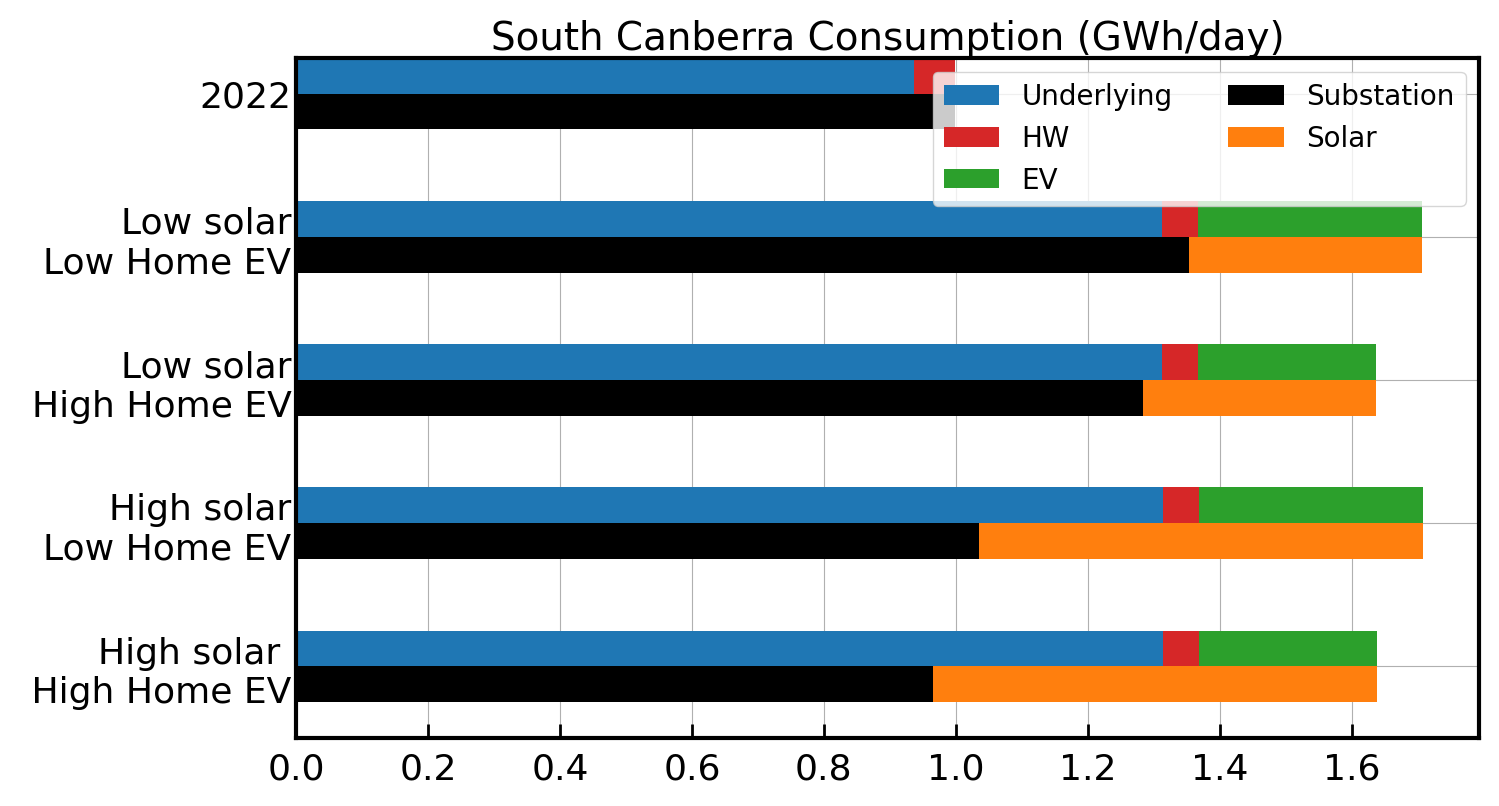

In [4]:
local = "Belconnen"
# High solar High Home EV, High solar Low Home EV, Low solar High Home EV, Low solar Low Home EV, Current
total_consumption = [1.375, 1.276, 1.795, 1.696, 1.321]
utilisation = [38.2, 35.5, 49.8, 47.1, 36.7]
POE_90 = [154.2, 148.3, 154.8, 148.8, 106.9]
peak = [175.1, 174.7, 175.3, 174.9, 133.8]
EV_value1 = 0.4678722027148407
EV_value2 = 0.36967680214505924
HW_value = 0.144
solar_value1 = 0.8861
solar_value2 = 0.465
zs_capacity = 169 # 2hr emergency rating
current_HW = 0.165

local = "Gungahlin"
total_consumption = [0.988, 0.905, 1.148, 1.064, 0.706]
utilisation = [72.2, 66.1, 83.9, 77.8, 51.6]
POE_90 = [98.1, 92.1, 98.6, 92.7, 62.4]
peak = [111.8, 111.4, 114.2, 111.5, 88.3]
EV_value1 = 0.399
EV_value2 = 0.315
HW_value = 0.109
solar_value1 = 0.3367
solar_value2 = 0.1767
zs_capacity = 74
current_HW = 0.129

# local = "North Canberra"
# total_consumption = [1.974, 2.028, 2.548, 2.602, 1.637]
# utilisation = [40.1, 41.2, 51.8, 52.9, 33.3]
# POE_90 = [183.3, 185.2, 186.4, 193.9, 94.4]
# peak = [209.9, 218.5, 215.2, 223.9, 128.9]
# EV_value1 = 0.417
# EV_value2 = 0.470
# HW_value = 0.1433
# solar_value1 = 1.211
# solar_value2 = 0.6355
# zs_capacity = 205
# current_HW = 0.133



local = "South Canberra"
total_consumption = [.965, 1.035, 1.284, 1.354, 0.999]
utilisation = [35.3, 37.8, 46.9, 49.5, 36.5]
POE_90 = [93.4, 100.3, 97.9, 106.2, 62]
peak = [111.4, 120.1, 113.6, 122.2, 79.5]
EV_value1 = 0.2698
EV_value2 = 0.3396
HW_value = 0.0553
solar_value1 = 0.6735
solar_value2 = 0.3534
zs_capacity = 114
current_HW = 0.063

EV = [EV_value1, EV_value2, EV_value1, EV_value2, 0]
HW = [HW_value,HW_value,HW_value,HW_value,current_HW]
solar = [solar_value1, solar_value1, solar_value2, solar_value2, 0]

index = ['High solar \n High Home EV', 'High solar\nLow Home EV', 'Low solar\nHigh Home EV', 'Low solar\nLow Home EV', '2022']

title = local+" Consumption (GWh/day)"
df = pd.DataFrame({'Underlying': np.array(total_consumption)-np.array(EV)-np.array(HW)+np.array(solar), 'HW': HW, 'EV': EV,
                  'Substation': np.array(total_consumption), 'Solar': solar}, index=index)
# ax = df.plot.barh(stacked=True, title=title, color=colors[0:4])

fig, ax = plt.subplots()
df[['Underlying', 'HW', 'EV']].plot.barh(stacked=True, width=0.25, position=0., color=colors[0:3], ax=ax)
df[['Substation', 'Solar']].plot.barh(stacked=True, width=0.25, position=1.0, color=['k',colors[3]], ax=ax,
    title=title, )
plt.legend(ncols=2, loc='upper right')
plt.show()

# ax = df.plot.barh(stacked=True, title=title, color=[colors[0],colors[1],colors[2],'white'], edgecolor='black')
plt.savefig(local+'-Consumption2.png')
plt.savefig(local+'-Consumption2.pdf')